In [5]:
from langdetect import detect
from googletrans import Translator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [6]:
data = pd.read_csv('train.csv')
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [7]:
sample = data.sample(2000)
sample.reset_index(drop=True,inplace=True)

In [8]:
sample

,id,keyword,location,text,target
0,1045,bleeding,dmv ?? fashion school @ KSU.,i hit my foot now my toe is bleeding ??,0
1,8776,siren,NaN,Pharma overloaded with a loud cry like an emer...,0
2,4362,earthquake,NaN,#USGS M 0.9 - Northern California: Time2015-08...,1
3,2865,damage,"Columbia, SC",@writebothfists It got pretty windy here too.....,0
4,9953,trouble,NaN,Nothing but trouble - Lil Wayne &amp; Charlie ...,0
...,...,...,...,...,...
1995,1195,blizzard,Himalayan Mountains,#Tweet4Taiji is a dolphin worship group based ...,1
1996,10058,typhoon,NaN,#Breaking144 Obama Declares Disaster for Typho...,1
1997,10839,NaN,NaN,Calgary Police Flood Road Closures in Calgary....,1
1998,9216,suicide%20bombing,Chicago IL,bout to go suicide bombing http://t.co/ZoIPkPBD6o,1


In [9]:
df = sample[['text','target']]
df

,text,target
0,i hit my foot now my toe is bleeding ??,0
1,Pharma overloaded with a loud cry like an emer...,0
2,#USGS M 0.9 - Northern California: Time2015-08...,1
3,@writebothfists It got pretty windy here too.....,0
4,Nothing but trouble - Lil Wayne &amp; Charlie ...,0
...,...,...
1995,#Tweet4Taiji is a dolphin worship group based ...,1
1996,#Breaking144 Obama Declares Disaster for Typho...,1
1997,Calgary Police Flood Road Closures in Calgary....,1
1998,bout to go suicide bombing http://t.co/ZoIPkPBD6o,1


In [11]:
def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

list_unigrams = df.text.apply(lambda x : ngram_extractor(x,1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
    
cnt = Counter(final_unigram).most_common(25)

In [12]:
# preprocessing
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text
stopword_list = stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

In [14]:
clean_text = df.text.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [15]:
clean_text

0                              [hit, foot, toe, bleeding]
1       [pharma, overloaded, loud, cry, like, emergenc...
2       [usgs, northern, california, utc, epicenter, h...
3            [writebothfists, got, pretty, windy, damage]
4       [nothing, trouble, lil, wayne, amp, charlie, p...
                              ...                        
1995    [dolphin, worship, group, based, superstitions...
1996    [obama, declares, disaster, saipan, obama, sig...
1997    [calgary, police, flood, road, closures, calga...
1998                       [bout, suicide, bombing, http]
1999    [amazon, prime, day, quick, takeaways, magnifi...
Name: text, Length: 2000, dtype: object

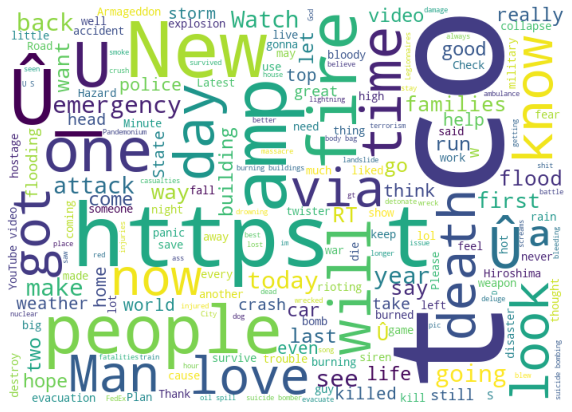

In [16]:
def word_cloud(data,column):
    df_ = data[column].str.cat(sep=' ')
    text = ' '.join([word for word in df_.split()])
    wordcloud = WordCloud(width = 700, height = 500, background_color = 'white').generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
word_cloud(df,'text')


In [17]:
# preprocessing 
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning 
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                   # and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]

# 5.autocorrect 
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [18]:
clean_text_train = df.text.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

In [19]:
clean_text_train

0                                   hit foot toe bleeding
1       pharma overloaded loud cry like emergency sire...
2       usgs northern california utc epicenter http ea...
3                  writebothfists got pretty windy damage
4              nothing trouble lil wayne amp charlie puth
                              ...                        
1995    dolphin worship group based superstition take ...
1996    obama declares disaster saipan obama sign disa...
1997       calgary police flood road closure calgary http
1998                            bout suicide bombing http
1999    amazon prime day quick takeaway amazonuas magn...
Name: text, Length: 2000, dtype: object

### Text Vectorization

In [20]:
count_vect = CountVectorizer()
bow =count_vect.fit_transform(clean_text_train).A
pd.DataFrame(bow, columns= count_vect.get_feature_names())

,aaaa,aaarrrgghhh,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,abcnorio,...,zionist,zippednews,zipper,zippoline,zojadelin,zombie,zone,zotar,zumiez,zxathetis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf,columns= tfidf_vect.get_feature_names())

,aaaa,aaarrrgghhh,aba,abandon,abandoned,abbott,abbswinston,abc,abcnews,abcnorio,...,zionist,zippednews,zipper,zippoline,zojadelin,zombie,zone,zotar,zumiez,zxathetis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
print(splitted_sent)

[['hit', 'foot', 'toe', 'bleeding'], ['pharma', 'overloaded', 'loud', 'cry', 'like', 'emergency', 'siren', 'fucking'], ['usgs', 'northern', 'california', 'utc', 'epicenter', 'http', 'earthtwerk'], ['writebothfists', 'got', 'pretty', 'windy', 'damage'], ['nothing', 'trouble', 'lil', 'wayne', 'amp', 'charlie', 'puth'], ['heard', 'two', 'death', 'murder', 'chrissie', 'kill', 'adam', 'val', 'finn', 'die', 'emmerdale'], ['happy', 'boy', 'mass', 'murderer', 'http'], ['panic', 'disco', 'amo'], ['liked', 'youtube', 'video', 'kevinedwardsjr', 'http', 'mortal', 'kombat', 'gameplay', 'mkx'], ['amen', 'today', 'day', 'salvation', 'thanks', 'brother', 'mike', 'great', 'encouragement', 'http', 'coming', 'tsunami'], ['glenstannard', 'essexweather', 'know', 'abouts', 'heard', 'emergency', 'service', 'near'], ['bin', 'laden', 'family', 'plane', 'crashed', 'microlight', 'landing', 'far', 'runway', 'http', 'rochdale', 'heywood'], ['brain', 'twister', 'homefolk', 'opinionated', 'proposal', 'modernized', '

## Word2Vec

In [23]:
word_2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)


In [24]:
word_2vec_model.save('word2vec.model')

In [25]:
# numerical format of document
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew:
            if word in model.wv:
                try:
                    vectors.append(model.wv[word]) # model.wv['bad']
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature

In [26]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)

In [27]:
vectorized_docs

[array([-7.1963184e-03, -1.9462833e-04,  7.2124810e-03, -6.5500889e-04,
         3.4601223e-03, -6.0086199e-03, -4.9228822e-03,  5.2577523e-03,
         1.0020813e-03, -4.3421555e-03, -4.3386356e-03, -3.4809124e-03,
        -4.6562837e-03, -6.0783670e-04, -1.8016776e-03, -2.6282007e-03,
        -1.5431495e-03, -6.8948683e-03,  2.3716576e-03,  9.9135155e-04,
        -2.6765130e-03,  2.5762438e-03,  8.2585840e-03,  3.5307731e-03,
         1.5713698e-03, -4.0285694e-03, -2.0193632e-03, -1.3943039e-03,
        -7.7599655e-03,  8.1373798e-03,  2.8754361e-03, -1.3634833e-03,
         2.1120983e-04, -5.6435172e-03, -7.1185984e-04, -1.9110820e-03,
         1.0967440e-03, -6.4532380e-03, -2.0533872e-03, -6.2636598e-03,
         2.6900934e-03, -2.5992070e-03,  2.4445626e-05,  4.6876152e-03,
         2.3613402e-03, -3.0209671e-03,  1.0412371e-03, -3.4026850e-03,
         9.7321989e-03,  2.7691780e-03, -7.6472964e-03, -2.0361368e-03,
        -3.8644113e-03, -1.1356787e-03, -4.0923458e-04, -4.43710

In [28]:
vectorized_docs[0]

array([-7.1963184e-03, -1.9462833e-04,  7.2124810e-03, -6.5500889e-04,
        3.4601223e-03, -6.0086199e-03, -4.9228822e-03,  5.2577523e-03,
        1.0020813e-03, -4.3421555e-03, -4.3386356e-03, -3.4809124e-03,
       -4.6562837e-03, -6.0783670e-04, -1.8016776e-03, -2.6282007e-03,
       -1.5431495e-03, -6.8948683e-03,  2.3716576e-03,  9.9135155e-04,
       -2.6765130e-03,  2.5762438e-03,  8.2585840e-03,  3.5307731e-03,
        1.5713698e-03, -4.0285694e-03, -2.0193632e-03, -1.3943039e-03,
       -7.7599655e-03,  8.1373798e-03,  2.8754361e-03, -1.3634833e-03,
        2.1120983e-04, -5.6435172e-03, -7.1185984e-04, -1.9110820e-03,
        1.0967440e-03, -6.4532380e-03, -2.0533872e-03, -6.2636598e-03,
        2.6900934e-03, -2.5992070e-03,  2.4445626e-05,  4.6876152e-03,
        2.3613402e-03, -3.0209671e-03,  1.0412371e-03, -3.4026850e-03,
        9.7321989e-03,  2.7691780e-03, -7.6472964e-03, -2.0361368e-03,
       -3.8644113e-03, -1.1356787e-03, -4.0923458e-04, -4.4371043e-03,
      

In [29]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-7.19631836e-03, -1.94628330e-04,  7.21248100e-03, ...,
         3.50638758e-04, -5.10480721e-04,  1.66057236e-03],
       [-7.00790295e-03,  9.06598475e-03,  1.00418995e-03, ...,
        -6.64732093e-03, -1.38895737e-03,  9.56411066e-04],
       [-8.48810282e-03,  1.55562488e-02,  4.53837309e-03, ...,
        -9.11138766e-03,  2.07012054e-03,  2.90219294e-04],
       ...,
       [-7.36392057e-03,  7.01841107e-03,  7.09719025e-04, ...,
        -9.04062111e-03,  1.41963339e-03, -7.21552409e-04],
       [-1.29095353e-02,  1.49460686e-02,  6.86841737e-03, ...,
        -1.71797760e-02,  4.49906662e-03,  4.32401663e-04],
       [-1.27150957e-02,  1.41071426e-02,  6.09165011e-03, ...,
        -1.75066683e-02, -1.79216258e-05,  1.10076729e-03]])

In [30]:
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [32]:
# kmeans-countvectorizer
kmeans_model_count, count_pred = build_kmeans(3,bow)

In [33]:
count_pred

array([1, 1, 0, ..., 0, 0, 0])

In [34]:
# kmeans-tfidf-vectorizer
kmeans_model_tfidf, tfidf_pred = build_kmeans(3,tfidf)

In [35]:
tfidf_pred

array([0, 0, 2, ..., 2, 2, 2])

In [36]:
# kmeans-word2vec
kmeans_model_word2vec, word2vec_pred = build_kmeans(3,x_emb)

In [37]:
word2vec_pred # label -target column

array([0, 1, 1, ..., 1, 2, 2])

### Silhouette Score

In [38]:
print(f'silhouette_score with kmeans-count : {silhouette_score(bow,count_pred)}')
print(f'silhouette_score with kmeans-tfidf : {silhouette_score(tfidf,tfidf_pred)}')
print(f'silhouette_score with kmeans-word2vec : {silhouette_score(x_emb,word2vec_pred)}')

silhouette_score with kmeans-count : 0.04349753732864305
silhouette_score with kmeans-tfidf : 0.004736651852582311
silhouette_score with kmeans-word2vec : 0.2474096597075731


In [39]:
def visulize_silhouette(data,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    plt.title(f'Silhouette visualizer for {title1}')

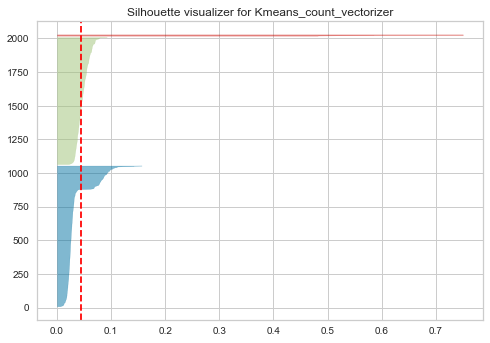

In [40]:
# kmeans-count
visulize_silhouette(bow,kmeans_model_count,'Kmeans_count_vectorizer')

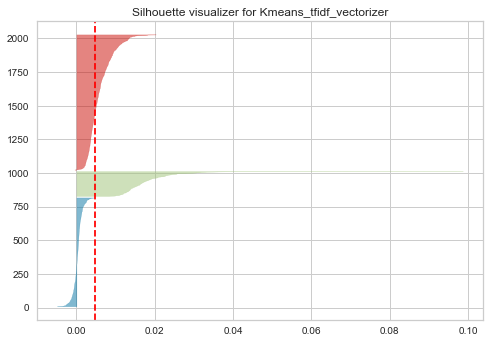

In [41]:
# kmeans-tfidf
visulize_silhouette(tfidf,kmeans_model_tfidf,'Kmeans_tfidf_vectorizer')

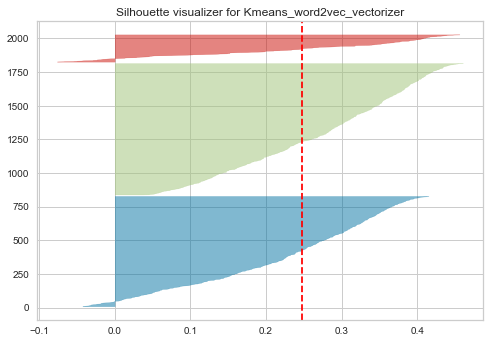

In [42]:
# kmeans-word2vec
visulize_silhouette(x_emb,kmeans_model_word2vec,'Kmeans_word2vec_vectorizer')